In [1]:
from dask.distributed import Client
client = Client()

In [2]:
import dask.dataframe as dd

def readCSV(file, debug=False):
    if debug: print('Reading ' + file)
    return dd.read_csv(file, parse_dates=['CHARTTIME', 'STORETIME'], dtype={'CGID': 'float64','ICUSTAY_ID': 'float64'})

In [3]:
path = './EVENTS_1000000.csv'

df = readCSV(path)

In [4]:
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,788,36,165660,241249.0,223834,2134-05-12 12:00:00,2134-05-12 13:56:00,17525.0,15.00,15.00,L/min,0,0,NaN,NaN
1,789,36,165660,241249.0,223835,2134-05-12 12:00:00,2134-05-12 13:56:00,17525.0,100.00,100.00,NaN,0,0,NaN,NaN
2,790,36,165660,241249.0,224328,2134-05-12 12:00:00,2134-05-12 12:18:00,20823.0,0.37,0.37,NaN,0,0,NaN,NaN
3,791,36,165660,241249.0,224329,2134-05-12 12:00:00,2134-05-12 12:19:00,20823.0,6.00,6.00,min,0,0,NaN,NaN
4,792,36,165660,241249.0,224330,2134-05-12 12:00:00,2134-05-12 12:19:00,20823.0,2.50,2.50,NaN,0,0,NaN,NaN


In [7]:
df.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CGID,VALUE,VALUENUM,WARNING,ERROR,RESULTSTATUS,STOPPED
npartitions=1,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...


In [28]:
# Get histogram of values per item
def item_hist(df, item):
    df_item = df[['ITEMID', 'VALUENUM']].query(f'ITEMID == {item}')
    df_item.compute().plot(x='ITEMID', y='VALUENUM', kind='hist')

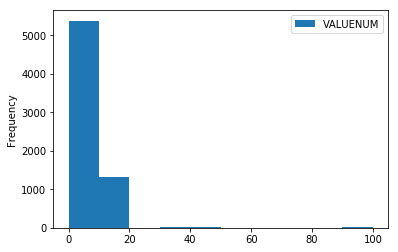

In [30]:
# Histogram for ITEMID 223834
item_hist(df, item=223834)

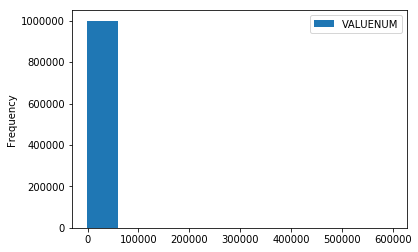

In [12]:
# 